# Análisis de datos de las visitas a los Museos de Madrid

### Proyecto focalizado en el análisis de datos sobre los visitantes en los museos de la Comunidad de Madrid. 


Paula Garcia Fernandez  -  octubre 2024


---

***

## OBTENCIÓN DE LOS DATOS

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import geopandas as gpd

### CONSUMO CULTURAL

In [166]:
# info general datos informacion comunicacion transporte
datos_museos_1 = pd.read_csv('./datos/otros_datos/https-datos-madrid-es-egob-catalogo-201132-0-museos-3.csv' , sep=";", encoding='latin')

# la calificacion por museo es interesante pero el mas visitado es el museo de historia de madrid y algo no me cuadra...
datos_museos_2 = pd.read_csv("./datos/otros_datos/estudioSatisfaccion2023.csv", sep=";", encoding='utf-8')

# IMPORATENTE ESTE ES MUY BUENO PARA UNA INTRO   pero faltan videojuegos... estos snobs culturetas del mundo del arte son de lo peor...
datos_museos_3 = pd.read_csv("./datos/otros_datos/actividades_culturales.csv", sep=",", encoding='utf-8')

# ESTE ESTA MUY GUAY PARA VER LOCALIZACIONES Y FOCOS DE INTERES CULTURAL
datos_museos_4 = pd.read_csv("./datos/otros_datos/MuseosdeMadrid_-1519955177370181428.csv", sep=",", encoding='utf-8')

### **JOBO** - CONSUMO CULTURAL JUVENIL

In [167]:
# USUARIOS ----->   INTERESANTE LA CIUDAD DE PROCEDENCIA
# ENTRADAS ----->   INTERESANTE EL ORGANISMO, EVENTO ...

# 2024 - 2018 ----->   INCOMPLETOS

# 2024
jobo_usuarios_2024 = pd.read_csv("./datos/JOBO/JOBO_usuarios_2024.csv", sep=";", encoding='utf-8')
jobo_entradas_2024 = pd.read_csv("./datos/JOBO/JOBO_entradas_emitidas_2024.csv", sep=";", encoding='utf-8')

# 2023
jobo_usuarios_2023 = pd.read_csv("./datos/JOBO/JOBO_usuarios_2023.csv", sep=";", encoding='utf-8')
jobo_entradas_2023 = pd.read_csv("./datos/JOBO/JOBO_entradas_emitidas_2023.csv", sep=";", encoding='utf-8')

# 2022
jobo_usuarios_2022 = pd.read_csv("./datos/JOBO/JOBO_usuarios_2022.csv", sep=";", encoding='utf-8')
jobo_entradas_2022 = pd.read_csv("./datos/JOBO/JOBO_entradas_emitidas_2022.csv", sep=";", encoding='utf-8')

# 2021
jobo_usuarios_2021 = pd.read_csv("./datos/JOBO/JOBO_usuarios_2021.csv", sep=";", encoding='utf-8')
jobo_entradas_2021 = pd.read_csv("./datos/JOBO/JOBO_entradas_emitidas_2021.csv", sep=";", encoding='utf-8')

# 2020
jobo_usuarios_2020 = pd.read_csv("./datos/JOBO/JOBO_usuarios_2020.csv", sep=";", encoding='latin')
jobo_entradas_2020 = pd.read_csv("./datos/JOBO/JOBO_entradas_emitidas_2020.csv", sep=";", encoding='latin')

# 2019
jobo_usuarios_2019 = pd.read_csv("./datos/JOBO/JOBO_usuarios_2019.csv", sep=";", encoding='latin')
jobo_entradas_2019 = pd.read_csv("./datos/JOBO/JOBO_entradas_emitidas_2019.csv", sep=";", encoding='latin')

# 2018
jobo_entradas_2018 = pd.read_csv("./datos/JOBO/JOBO_entradas_2018.csv", sep=";", encoding='latin')

### TARIFAS Y VISITANTES


In [168]:
# SACAR PRECIOS
tarifas = pd.read_csv("./datos/VISITANTES_GENERAL/tarifas_museos_madrid.csv", sep=",", encoding='utf-8')

# SACAR MEDIA DE EDADES Y PROPORCION DE VISITANTES NACIONALES INTERNACIONALES
visitantes = pd.read_csv("./datos/VISITANTES_GENERAL/visitantes_museos_madrid_visitas.csv", sep=",", encoding='utf-8')

# ESTO MEJOR SACARLO DE MANERA INDIVIDUAL EN CADA MUSEO
visitantes_renta_estudios = pd.read_csv("./datos/VISITANTES_GENERAL/visitantes_museos_madrid_amplio.csv", sep=",", encoding='utf-8')

### MUSEOS INDIVIDUALES


In [169]:
prado = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_del_prado_visitantes_filtrados.csv", sep=",", encoding='utf-8')
caixa_forum = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/caixaforum_madrid_visitantes_filtrados.csv", sep=",", encoding='utf-8')
arqueologico = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_arqueológico_nacional_visitantes_filtrados.csv", sep=",", encoding='utf-8')
cerralbo = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_cerralbo_visitantes_filtrados.csv", sep=",", encoding='utf-8')
romanticismo = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_del_romanticismo_visitantes_filtrados.csv", sep=",", encoding='utf-8')
historia_madrid = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_de_historia_de_madrid_visitantes_filtrados.csv", sep=",", encoding='utf-8')
nacional_de_ciencias_naturales = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_nacional_de_ciencias_naturales_visitantes_filtrados.csv", sep=",", encoding='utf-8')
reina_sofia = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_reina_sofia_visitantes_filtrados.csv", sep=",", encoding='utf-8')
santiago_bernabeu = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_santiago_bernabeu_visitantes_filtrados.csv", sep=",", encoding='utf-8')
sorolla = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_sorolla_visitantes_filtrados.csv", sep=",", encoding='utf-8')
thyssen = pd.read_csv("./datos/MUSEOS_INDIVIDUALES/museo_thyssen_bornemisza_visitantes_filtrados.csv", sep=",", encoding='utf-8')

---

***

# DATA CLEANING

Vamos a comenzar por analizar el interes cultural en general de los españoles


In [170]:
datos_museos_3.head(1)

,Unnamed: 0,Hombres_2021,Hombres_2018,Hombres_2014,Hombres_2010,Mujeres_2021,Mujeres_2018,Mujeres_2014,Mujeres_2010
0,"Visitaron museos, exposiciones y galerías de arte",26.5,46.5,38.8,38.1,24.6,46.9,40.1,37.6


In [171]:
datos_museos_3.describe()

,Hombres_2021,Hombres_2018,Hombres_2014,Hombres_2010,Mujeres_2021,Mujeres_2018,Mujeres_2014,Mujeres_2010
count,27.000000,27.000000,27.000000,23.000000,27.000000,27.000000,27.000000,23.000000
mean,18.029630,28.114815,24.596296,24.530435,18.474074,29.577778,26.470370,24.573913
std,16.154942,18.937767,17.218985,16.104952,18.065364,20.138660,19.071098,16.591625
min,0.400000,1.400000,1.300000,1.500000,0.300000,1.600000,2.200000,1.600000
25%,6.850000,10.200000,7.750000,11.850000,6.750000,10.150000,8.900000,10.700000
50%,13.700000,24.800000,23.400000,23.700000,12.800000,28.700000,25.200000,24.500000
75%,27.250000,43.250000,35.550000,35.500000,25.000000,43.900000,37.150000,34.050000
max,58.100000,62.000000,57.600000,56.000000,65.100000,69.400000,66.500000,61.200000


In [172]:
datos_museos_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    27 non-null     object 
 1   Hombres_2021  27 non-null     float64
 2   Hombres_2018  27 non-null     float64
 3   Hombres_2014  27 non-null     float64
 4   Hombres_2010  23 non-null     float64
 5   Mujeres_2021  27 non-null     float64
 6   Mujeres_2018  27 non-null     float64
 7   Mujeres_2014  27 non-null     float64
 8   Mujeres_2010  23 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


In [173]:
datos_museos_3['Unnamed: 0'].unique()

# para que sea mas claro voy a agrupar las actividades por tipos...

array(['Visitaron museos, exposiciones y galerías de arte', 'Museos',
       'Exposiciones', 'Galerías de arte',
       'Visitaron monumentos y yacimientos', 'Monumentos',
       'Yacimientos arqueológicos', 'Visitaron archivos',
       'Fueron a una biblioteca', 'Ir a una biblioteca',
       'Acceder por internet a la biblioteca', 'Leyeron libros',
       'Libros relacionados con la profesión o estudios',
       'Libros no relacionados con la profesión o estudios',
       'Lectores formato papel', 'Lectores formato digital',
       'Lectores de internet',
       'Asistieron a actividades de artes escénicas', 'Teatro', 'Ópera',
       'Zarzuela', 'Ballet/Danza', 'Circo',
       'Asistieron a actividades de artes musicales',
       'Conciertos de música clásica', 'Conciertos de música actual',
       'Asistieron al cine'], dtype=object)

<span style="color: yellow">**Museos y exposiciones:** Incluye todas las actividades relacionadas con museos, exposiciones y galerías de arte.</span>

<span style="color: yellow">**Monumentos y yacimientos:** Actividades relacionadas con la visita a monumentos históricos y yacimientos arqueológicos.</span>

<span style="color: yellow">**Archivos y bibliotecas:** Incluye visitas a archivos y bibliotecas, tanto físicas como en línea.</span>

<span style="color: yellow">**Lectura:** Actividades relacionadas con la lectura de libros, ya sea en formato digital o físico.</span>

<span style="color: yellow">**Artes escénicas:** Incluye actividades como teatro, ópera, zarzuela, ballet, danza, circo.</span>

<span style="color: yellow">**Música:** Actividades relacionadas con conciertos de música clásica o contemporánea.</span>

<span style="color: yellow">**Cine:** Asistencia al cine.</span>


In [174]:
def categorize_activity(activity):
    if 'museos' in activity.lower() or 'exposiciones' in activity.lower() or 'galerías de arte' in activity.lower():
        return 'Museos y exposiciones'
    elif 'monumentos' in activity.lower() or 'yacimientos' in activity.lower():
        return 'Monumentos y yacimientos'
    elif 'biblioteca' in activity.lower() or 'archivos' in activity.lower():
        return 'Archivos y bibliotecas'
    elif 'libros' in activity.lower() or 'lectores' in activity.lower():
        return 'Lectura'
    elif 'teatro' in activity.lower() or 'ópera' in activity.lower() or 'zarzuela' in activity.lower() or \
         'ballet' in activity.lower() or 'danza' in activity.lower() or 'circo' in activity.lower():
        return 'Artes escénicas'
    elif 'conciertos' in activity.lower():
        return 'Música'
    elif 'cine' in activity.lower():
        return 'Cine'
    else:
        return 'Otras actividades'


datos_museos_3['Grupo_Actividad'] = datos_museos_3['Unnamed: 0'].apply(categorize_activity)
datos_museos_3.head(1)

,Unnamed: 0,Hombres_2021,Hombres_2018,Hombres_2014,Hombres_2010,Mujeres_2021,Mujeres_2018,Mujeres_2014,Mujeres_2010,Grupo_Actividad
0,"Visitaron museos, exposiciones y galerías de arte",26.5,46.5,38.8,38.1,24.6,46.9,40.1,37.6,Museos y exposiciones


In [175]:
numeric_columns = ['Hombres_2021', 'Hombres_2018', 'Hombres_2014', 'Hombres_2010', 'Mujeres_2021', 'Mujeres_2018', 'Mujeres_2014', 'Mujeres_2010']

datos_museos_3[numeric_columns] = datos_museos_3[numeric_columns].astype(float)

grouped_data = datos_museos_3.groupby('Grupo_Actividad')[numeric_columns].mean()
grouped_data


,Hombres_2021,Hombres_2018,Hombres_2014,Hombres_2010,Mujeres_2021,Mujeres_2018,Mujeres_2014,Mujeres_2010
Grupo_Actividad,,,,,,,,
Archivos y bibliotecas,10.125000,15.650000,14.350000,14.450000,11.675000,17.700000,16.525000,15.500000
Artes escénicas,2.460000,7.800000,7.400000,6.500000,2.740000,9.940000,9.480000,8.125000
Cine,28.100000,58.400000,54.400000,50.500000,27.400000,57.300000,53.600000,47.700000
Lectura,37.783333,39.866667,36.016667,44.500000,41.283333,43.633333,40.416667,47.633333
Monumentos y yacimientos,23.900000,41.600000,34.000000,33.166667,20.366667,39.733333,33.200000,29.633333
Museos y exposiciones,17.550000,32.800000,26.650000,26.875000,16.025000,33.675000,27.950000,27.000000
Música,7.300000,20.450000,16.900000,18.300000,7.000000,19.100000,16.200000,15.350000
Otras actividades,11.350000,31.500000,28.400000,26.400000,12.050000,33.450000,30.650000,26.250000


In [176]:
datos_museos_2021 = grouped_data[['Hombres_2021', 'Mujeres_2021']]
datos_museos_2021.head(1)

,Hombres_2021,Mujeres_2021
Grupo_Actividad,,
Archivos y bibliotecas,10.125,11.675


In [177]:
datos_museos_2018 = grouped_data[['Hombres_2018', 'Mujeres_2018']]
datos_museos_2018.head(1)

,Hombres_2018,Mujeres_2018
Grupo_Actividad,,
Archivos y bibliotecas,15.65,17.7


In [178]:
datos_museos_2014 = grouped_data[['Hombres_2014', 'Mujeres_2014']]
datos_museos_2014.head(1)

,Hombres_2014,Mujeres_2014
Grupo_Actividad,,
Archivos y bibliotecas,14.35,16.525


In [179]:
datos_museos_2010 = grouped_data[['Hombres_2010', 'Mujeres_2010']]
datos_museos_2010.head(1)

,Hombres_2010,Mujeres_2010
Grupo_Actividad,,
Archivos y bibliotecas,14.45,15.5


<span style="color: yellow">Ya tengo mi introduccion, ahora nos vamos a centrar en los jovenes y como de eficaz esta siendo el JOBO</span>

In [180]:
jobo_usuarios_2023.head(1)

,Fecha extracción,Fecha de nacimiento,Ciudad,País,Código postal,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,23/01/2024 14:20,21/11/1997,A CORUÑA,España,15009.0,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
jobo_usuarios_2023_clean = jobo_usuarios_2023[['Ciudad', 'País']]
jobo_usuarios_2023_clean.head(1)

,Ciudad,País
0,A CORUÑA,España


In [182]:
# este calculo lo he tenido que hacer con IA porque aparecian miles de localidades sin identificar bien con su ciudad ... 
# tambien algunas pocas ciudades extranjeras

data = {
    "Comunidad Autónoma": [
        "Andalucía", "Aragón", "Asturias", "Canarias", "Cantabria", "Castilla y León", 
        "Castilla-La Mancha", "Cataluña", "Comunidad Valenciana", "Comunidad de Madrid", 
        "Extremadura", "Galicia", "Islas Baleares", "La Rioja", "Navarra", "País Vasco", 
        "Región de Murcia"],
    "Total": [119, 34, 15, 30, 14, 115, 308, 31, 70, 17561, 47, 46, 13, 6, 17, 49, 30]}

jobo_usuarios_2023_por_comunidad = pd.DataFrame(data)
jobo_usuarios_2023_por_comunidad 

,Comunidad Autónoma,Total
0,Andalucía,119
1,Aragón,34
2,Asturias,15
3,Canarias,30
4,Cantabria,14
5,Castilla y León,115
6,Castilla-La Mancha,308
7,Cataluña,31
8,Comunidad Valenciana,70
9,Comunidad de Madrid,17561


<span style="color: yellow">COMUNIDADES EN DONDE MAS ENTRADAS SE HAN COMPRADO CON EL JOBO</span>

<span style="color: yellow">TENER EN CUENTA QUE EL JOBO SOLO SE USA EN MADRID</span>

In [183]:
jobo_entradas_2023.head(1)

,Año,Mes,Organismo,Evento,Entradas
0,2023,enero,Circo Price,CIRCO PRICE EN NAVIDAD,59


In [184]:
jobo_usuarios_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46062 entries, 0 to 46061
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fecha extracción     46062 non-null  object 
 1   Fecha de nacimiento  46053 non-null  object 
 2   Ciudad               18911 non-null  object 
 3   País                 18978 non-null  object 
 4   Código postal        19335 non-null  float64
 5   Unnamed: 5           0 non-null      float64
 6   Unnamed: 6           0 non-null      float64
 7   Unnamed: 7           0 non-null      float64
 8   Unnamed: 8           0 non-null      float64
 9   Unnamed: 9           0 non-null      float64
 10  Unnamed: 10          1 non-null      object 
dtypes: float64(6), object(5)
memory usage: 3.9+ MB


In [185]:
def identificar_grupo_actividad(organismo):
    grupos = {
        'Museos y exposiciones': ['Condeduque', 'Conde Duque', 'Matadero', 'Naves del Español en Matadero', 'Naves Matadero'],
        'Monumentos y yacimientos': ['Convenios'],
        'Archivos y bibliotecas': [],
        'Lectura': [],
        'Artes escénicas': ['Circo Price', 'Teatro Español', 'Teatro Circo Price', 'Teatro Fernán Gómez. Centro Cultural de la Villa', 'Fernán Gómez', 'Naves del Español', 'Veranos de la Villa'],
        'Música': [],
        'Cine': ['Cineteca']
    }
    
    for grupo, organismos in grupos.items():
        if organismo in organismos:
            return grupo
    return 'Desconocido'

In [186]:
jobo_entradas_2023 = jobo_entradas_2023[['Organismo', 'Entradas']]

jobo_entradas_2023['Organismo'].unique()

array(['Circo Price', 'Naves del Español en Matadero', 'Teatro Español',
       'Cineteca', 'Condeduque',
       'Teatro Fernán Gómez. Centro Cultural de la Villa',
       'Teatro Circo Price', 'Conde Duque', 'Actividades culturales',
       'Convenios'], dtype=object)

In [187]:
jobo_entradas_2023['Grupo_Actividad'] = jobo_entradas_2023['Organismo'].apply(identificar_grupo_actividad)

jobo_entradas_2023 = jobo_entradas_2023.groupby(['Organismo', 'Grupo_Actividad'])['Entradas'].sum().reset_index()
jobo_entradas_2023

# 2023 limpio

,Organismo,Grupo_Actividad,Entradas
0,Actividades culturales,Desconocido,2045
1,Cineteca,Cine,5046
2,Circo Price,Artes escénicas,979
3,Conde Duque,Museos y exposiciones,707
4,Condeduque,Museos y exposiciones,1203
5,Convenios,Monumentos y yacimientos,478
6,Naves del Español en Matadero,Museos y exposiciones,5845
7,Teatro Circo Price,Artes escénicas,754
8,Teatro Español,Artes escénicas,6837
9,Teatro Fernán Gómez. Centro Cultural de la Villa,Artes escénicas,5656


In [188]:
jobo_entradas_2022 = jobo_entradas_2022[['Organismo', 'Entradas']]

jobo_entradas_2022['Organismo'].unique()

array(['Cineteca', 'Circo Price', 'Fernán Gómez', 'Naves del Español',
       'Teatro Español', 'Actividades Culturales', 'Condeduque', nan],
      dtype=object)

In [189]:
jobo_entradas_2022['Grupo_Actividad'] = jobo_entradas_2022['Organismo'].apply(identificar_grupo_actividad)

jobo_entradas_2022 = jobo_entradas_2022.groupby(['Organismo', 'Grupo_Actividad'])['Entradas'].sum().reset_index()
jobo_entradas_2022

# 2022 limpio

,Organismo,Grupo_Actividad,Entradas
0,Actividades Culturales,Desconocido,1112.0
1,Cineteca,Cine,2882.0
2,Circo Price,Artes escénicas,3459.0
3,Condeduque,Museos y exposiciones,1555.0
4,Fernán Gómez,Artes escénicas,4793.0
5,Naves del Español,Artes escénicas,7753.0
6,Teatro Español,Artes escénicas,9951.0


In [190]:
jobo_entradas_2021 = jobo_entradas_2021[['Organismo', 'Entradas']]

jobo_entradas_2021['Organismo'].unique()

array(['Conde Duque', 'Fernán Gómez', 'Naves Español en Matadero',
       'Circo Price', 'Teatro Español', 'Cineteca'], dtype=object)

In [191]:
jobo_entradas_2021['Grupo_Actividad'] = jobo_entradas_2021['Organismo'].apply(identificar_grupo_actividad)

jobo_entradas_2021 = jobo_entradas_2021.groupby(['Organismo', 'Grupo_Actividad'])['Entradas'].sum().reset_index()
jobo_entradas_2021

# 2021 limpio

,Organismo,Grupo_Actividad,Entradas
0,Cineteca,Cine,1001
1,Circo Price,Artes escénicas,3198
2,Conde Duque,Museos y exposiciones,1297
3,Fernán Gómez,Artes escénicas,6261
4,Naves Español en Matadero,Desconocido,7608
5,Teatro Español,Artes escénicas,9220


In [192]:
jobo_entradas_2020 = jobo_entradas_2020[['Organismo', 'Entradas']]

jobo_entradas_2020['Organismo'].unique()

array(['Cineteca', 'Conde Duque', 'Fernán Gómez',
       'Naves Español en Matadero', 'Circo Price', 'Teatro Español'],
      dtype=object)

In [193]:
jobo_entradas_2020['Grupo_Actividad'] = jobo_entradas_2020['Organismo'].apply(identificar_grupo_actividad)

jobo_entradas_2020 = jobo_entradas_2020.groupby(['Organismo', 'Grupo_Actividad'])['Entradas'].sum().reset_index()
jobo_entradas_2020

# 2020 limpio

,Organismo,Grupo_Actividad,Entradas
0,Cineteca,Cine,2653.0
1,Circo Price,Artes escénicas,4548.0
2,Conde Duque,Museos y exposiciones,2502.0
3,Fernán Gómez,Artes escénicas,6779.0
4,Naves Español en Matadero,Desconocido,3335.0
5,Teatro Español,Artes escénicas,7903.0


In [194]:
jobo_entradas_2019 = jobo_entradas_2019[['Organismo', 'Entradas']]

jobo_entradas_2019['Organismo'].unique()

array(['Cineteca', 'Conde Duque', 'Fernán Gómez', 'Naves Matadero',
       'Circo Price', 'Teatro Español', 'Madrid Destino'], dtype=object)

In [195]:
jobo_entradas_2019['Grupo_Actividad'] = jobo_entradas_2019['Organismo'].apply(identificar_grupo_actividad)

jobo_entradas_2019 = jobo_entradas_2019.groupby(['Organismo', 'Grupo_Actividad'])['Entradas'].sum().reset_index()
jobo_entradas_2019

# 2019 limpio

,Organismo,Grupo_Actividad,Entradas
0,Cineteca,Cine,12629.0
1,Circo Price,Artes escénicas,8835.0
2,Conde Duque,Museos y exposiciones,6151.0
3,Fernán Gómez,Artes escénicas,19654.0
4,Madrid Destino,Desconocido,272.0
5,Naves Matadero,Museos y exposiciones,2420.0
6,Teatro Español,Artes escénicas,16924.0


In [196]:
jobo_entradas_2018 = jobo_entradas_2018[['Organismo', 'Entradas']]

jobo_entradas_2018['Organismo'].unique()

array(['Cineteca', 'Conde Duque', 'Fernán Gómez', 'Naves Matadero',
       'Teatro Circo Price', 'Teatro Español', 'Veranos de la Villa',
       'Matadero', 'Circo Price', 'Madrid Destino'], dtype=object)

In [197]:
jobo_entradas_2018['Grupo_Actividad'] = jobo_entradas_2018['Organismo'].apply(identificar_grupo_actividad)

jobo_entradas_2018 = jobo_entradas_2018.groupby(['Organismo', 'Grupo_Actividad'])['Entradas'].sum().reset_index()
jobo_entradas_2018

# 2018 limpio

,Organismo,Grupo_Actividad,Entradas
0,Cineteca,Cine,5397.0
1,Circo Price,Artes escénicas,2761.0
2,Conde Duque,Museos y exposiciones,2870.0
3,Fernán Gómez,Artes escénicas,17261.0
4,Madrid Destino,Desconocido,64.0
5,Matadero,Museos y exposiciones,150.0
6,Naves Matadero,Museos y exposiciones,2549.0
7,Teatro Circo Price,Artes escénicas,6540.0
8,Teatro Español,Artes escénicas,14805.0
9,Veranos de la Villa,Artes escénicas,70.0


<span style="color: yellow">ACABE CON EL ANALISIS DEL JOBO, VEO QUE LOS MUSEOS TIENEN POPULARIDAD, AUNQUE NO SEAN LOS MAS POPULARES. TAMBIEN PUEDO CONSIDERAR QUE EL JOBO SE USA EN MADRID MAS QUE EN NINGUN OTRO SITIO...</span>

___

___

#   AHORA VAMOS CON LOS MUSEOS DE <span style="color: red">**M**</span><span style="color: yellow">A</span><span style="color: red">**D**</span><span style="color: yellow">R</span><span style="color: red">**I**</span><span style="color: yellow">D</span>

Primero los voy a ordenar del mas al menos visitado

In [198]:
# Estos datos los he extraido de internet como tal ya que no he encontrado ningun data set limpio
#  que me hablara de un numero extacto de visitantes anual por museo

data = {
    "Museo": [
        "Museo del Prado", 
        "Museo Reina Sofía", 
        "Museo Santiago Bernabéu", 
        "Museo Thyssen-Bornemisza", 
        "CaixaForum Madrid", 
        "Museo Nacional de Ciencias Naturales", 
        "Museo Arqueológico Nacional", 
        "Museo Sorolla", 
        "Museo Cerralbo", 
        "Museo de Historia de Madrid", 
        "Museo del Romanticismo"],
    "Visitantes": [
        3241263, 
        2530560, 
        1500000, 
        1000000, 
        1000000, 
        500000, 
        400000, 
        250000, 
        150000, 
        100000, 
        90000]}

ranking_visitas_museos = pd.DataFrame(data)
ranking_visitas_museos

,Museo,Visitantes
0,Museo del Prado,3241263
1,Museo Reina Sofía,2530560
2,Museo Santiago Bernabéu,1500000
3,Museo Thyssen-Bornemisza,1000000
4,CaixaForum Madrid,1000000
5,Museo Nacional de Ciencias Naturales,500000
6,Museo Arqueológico Nacional,400000
7,Museo Sorolla,250000
8,Museo Cerralbo,150000
9,Museo de Historia de Madrid,100000


In [199]:
# ahora me gustaria ver cual es el grupo que mas visita cada museo y su nivel de estudios

visitantes.head(1)

,Unnamed: 0,Museo,Visitantes_Hombres (%),Visitantes_Mujeres (%),Edad_<18 (%),Edad_18-35 (%),Edad_36-50 (%),Edad_>50 (%),Locales (%),Nacionales (%),Internacionales (%)
0,0,Museo del Prado,45,55,10,35,30,25,40,35,25


In [200]:
tarifas.head(1)

,Unnamed: 0,Museo,Entrada general,Día gratuito,Precio reducido,Descuento por edad,Notas adicionales
0,0,Museo del Prado,15€,"Lunes a Sábado 18:00-20:00, Domingos 17:00-19:00","7,50€ (estudiantes, mayores de 65)",Gratis menores de 18 y mayores de 65,Entrada gratuita para desempleados


# PRADO

In [201]:
# Reemplazar los valores de Género
prado['Género'] = prado['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
prado['Renta Anual (€)'] = prado['Renta Anual (€)'].replace({
    '<20,000€': 1,
    '20,000€ - 40,000€': 2,
    '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
prado['Nivel de Estudios'] = prado['Nivel de Estudios'].replace({
    'Educación Primaria': 1,
    'Educación Secundaria': 2,
    'Estudios Universitarios': 3,
    'Postgrado o Doctorado': 4})

# Reemplazar los valores de Edad
prado['Edad'] = prado['Edad'].replace({
    '<18': 1,
    '18-35': 2,
    '36-50': 3,
    '>50': 4})

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2847088680.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  prado['Género'] = prado['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2847088680.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  prado['Renta Anual (€)'] = prado['Renta Anual (€)'].replace({
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2847088680.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. T

In [202]:
prado.head(1)

,Museo,Género,Renta Anual (€),Nivel de Estudios,Edad,Locales (%),Nacionales (%),Internacionales (%),Visitantes por Grupo,Porcentaje Locales (%),Porcentaje Nacionales (%),Porcentaje Internacionales (%)
0,Museo del Prado,1,2,3,2,69,43,23,146,51.111111,31.851852,17.037037


In [203]:
prado_limpio = prado.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'}).reset_index()

prado_limpio['Museo'] = 'Prado'
prado_limpio

# interesante quedarme donde hay mas numero de visitantes por grupo

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,269,1.333333,2.0,3.0,39.000,21.333333,24.333333,Prado
1,2,1059,1.300000,2.1,2.6,51.400,28.000000,26.800000,Prado
2,3,626,1.500000,2.0,2.5,37.875,32.250000,26.375000,Prado
3,4,648,1.400000,1.7,2.9,42.300,34.500000,25.500000,Prado


In [204]:
# Encontrar la fila con el mayor número de Visitantes por Grupo

fila_max_visitantes_prado = prado_limpio.loc[[prado_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_prado

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
1,2,1059,1.3,2.1,2.6,51.4,28.0,26.8,Prado


___

___

# REINA SOFIA

In [205]:
# Reemplazar los valores de Género
reina_sofia['Género'] = reina_sofia['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
reina_sofia['Renta Anual (€)'] = reina_sofia['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
reina_sofia['Nivel de Estudios'] = reina_sofia['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
reina_sofia['Edad'] = reina_sofia['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
reina_sofia_limpio = reina_sofia.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

reina_sofia_limpio['Museo'] = 'Reina Sofia'
reina_sofia_limpio


C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\663571475.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reina_sofia['Género'] = reina_sofia['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\663571475.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reina_sofia['Renta Anual (€)'] = reina_sofia['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\663571475.py:8: FutureWarning: Downcasting beha

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,847,1.60,2.400000,3.400000,60.600000,21.400000,26.8,Reina Sofia
1,2,175,1.00,2.333333,2.333333,58.666667,35.666667,19.0,Reina Sofia
2,3,502,1.60,1.800000,3.200000,46.400000,30.600000,19.8,Reina Sofia
3,4,730,1.75,1.750000,2.500000,47.750000,33.000000,24.5,Reina Sofia


In [206]:
fila_max_visitantes_reina_sofia = reina_sofia_limpio.loc[[reina_sofia_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_reina_sofia

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,847,1.6,2.4,3.4,60.6,21.4,26.8,Reina Sofia


# SANTIAGO BERNABEU

In [207]:
# Reemplazar los valores de Género
santiago_bernabeu['Género'] = santiago_bernabeu['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
santiago_bernabeu['Renta Anual (€)'] = santiago_bernabeu['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
santiago_bernabeu['Nivel de Estudios'] = santiago_bernabeu['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
santiago_bernabeu['Edad'] = santiago_bernabeu['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
santiago_bernabeu_limpio = santiago_bernabeu.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

santiago_bernabeu_limpio['Museo'] = 'Santiago Bernabeu'
santiago_bernabeu_limpio

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2530914695.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  santiago_bernabeu['Género'] = santiago_bernabeu['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2530914695.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  santiago_bernabeu['Renta Anual (€)'] = santiago_bernabeu['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2530914695.py:8: Futu

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,3807,1.548387,2.225806,2.483871,44.580645,27.000000,24.967742,Santiago Bernabeu
1,2,1611,1.529412,2.235294,3.000000,40.294118,29.588235,25.882353,Santiago Bernabeu
2,3,2617,1.692308,2.076923,2.115385,43.692308,27.807692,23.923077,Santiago Bernabeu
3,4,2206,1.538462,1.846154,2.653846,42.692308,30.384615,20.192308,Santiago Bernabeu


In [208]:
fila_max_visitantes_santiago_bernabeu = santiago_bernabeu_limpio.loc[[santiago_bernabeu_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_santiago_bernabeu

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,3807,1.548387,2.225806,2.483871,44.580645,27.0,24.967742,Santiago Bernabeu


# THYSSEN - BORNEMISZA

In [209]:
# Reemplazar los valores de Género
thyssen['Género'] = thyssen['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
thyssen['Renta Anual (€)'] = thyssen['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
thyssen['Nivel de Estudios'] = thyssen['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
thyssen['Edad'] = thyssen['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
thyssen_limpio = thyssen.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

thyssen_limpio['Museo'] = 'Thyssen-Bornemisza'
thyssen_limpio

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\3352185242.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyssen['Género'] = thyssen['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\3352185242.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyssen['Renta Anual (€)'] = thyssen['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\3352185242.py:8: FutureWarning: Downcasting behavior in `repl

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1221,1.533333,2.066667,2.133333,43.333333,25.066667,29.866667,Thyssen-Bornemisza
1,2,461,1.500000,2.250000,1.750000,57.500000,20.500000,20.000000,Thyssen-Bornemisza
2,3,1217,1.500000,1.666667,2.333333,39.750000,36.750000,24.666667,Thyssen-Bornemisza
3,4,903,1.777778,1.666667,2.111111,55.333333,29.888889,25.555556,Thyssen-Bornemisza


In [210]:
fila_max_visitantes_thyssen = thyssen_limpio.loc[[thyssen_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_thyssen

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1221,1.533333,2.066667,2.133333,43.333333,25.066667,29.866667,Thyssen-Bornemisza


# CAIXA FORUM

In [211]:
# Reemplazar los valores de Género
caixa_forum['Género'] = caixa_forum['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
caixa_forum['Renta Anual (€)'] = caixa_forum['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
caixa_forum['Nivel de Estudios'] = caixa_forum['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
caixa_forum['Edad'] = caixa_forum['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
caixa_forum_limpio = caixa_forum.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

caixa_forum_limpio['Museo'] = 'Caixa Forum'
caixa_forum_limpio

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2361177404.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  caixa_forum['Género'] = caixa_forum['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2361177404.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  caixa_forum['Renta Anual (€)'] = caixa_forum['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2361177404.py:8: FutureWarning: Downcasting b

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,929,1.555556,1.555556,2.777778,38.777778,21.777778,25.777778,Caixa Forum
1,2,781,1.888889,2.111111,2.444444,41.000000,31.111111,33.000000,Caixa Forum
2,3,1143,1.500000,1.500000,2.400000,43.500000,25.800000,23.600000,Caixa Forum
3,4,1086,1.636364,2.090909,2.727273,38.363636,23.454545,20.000000,Caixa Forum


In [212]:
fila_max_visitantes_caixa_forum = caixa_forum_limpio.loc[[caixa_forum_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_caixa_forum

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
2,3,1143,1.5,1.5,2.4,43.5,25.8,23.6,Caixa Forum


# CIENCIAS NATURALES

In [213]:
# Reemplazar los valores de Género
nacional_de_ciencias_naturales['Género'] = nacional_de_ciencias_naturales['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
nacional_de_ciencias_naturales['Renta Anual (€)'] = nacional_de_ciencias_naturales['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
nacional_de_ciencias_naturales['Nivel de Estudios'] = nacional_de_ciencias_naturales['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
nacional_de_ciencias_naturales['Edad'] = nacional_de_ciencias_naturales['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
nacional_de_ciencias_naturales_limpio = nacional_de_ciencias_naturales.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

nacional_de_ciencias_naturales_limpio['Museo'] = 'Nacional de Ciencias Naturales'
nacional_de_ciencias_naturales_limpio

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\3645491731.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nacional_de_ciencias_naturales['Género'] = nacional_de_ciencias_naturales['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\3645491731.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nacional_de_ciencias_naturales['Renta Anual (€)'] = nacional_de_ciencias_naturales['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppD

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,789,1.444444,1.666667,1.444444,47.666667,32.222222,19.666667,Nacional de Ciencias Naturales
1,2,417,1.666667,2.166667,2.166667,34.333333,31.333333,27.666667,Nacional de Ciencias Naturales
2,3,459,1.200000,2.000000,2.500000,43.500000,34.900000,26.100000,Nacional de Ciencias Naturales
3,4,1062,1.600000,1.700000,2.300000,46.000000,26.200000,24.500000,Nacional de Ciencias Naturales


In [214]:
fila_max_visitantes_nacional_de_ciencias_naturales = nacional_de_ciencias_naturales_limpio.loc[[nacional_de_ciencias_naturales_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_nacional_de_ciencias_naturales

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
3,4,1062,1.6,1.7,2.3,46.0,26.2,24.5,Nacional de Ciencias Naturales


# ARQUEOLOGICO NACIONAL

In [215]:
# Reemplazar los valores de Género
arqueologico['Género'] = arqueologico['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
arqueologico['Renta Anual (€)'] = arqueologico['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
arqueologico['Nivel de Estudios'] = arqueologico['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
arqueologico['Edad'] = arqueologico['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
arqueologico_limpio = arqueologico.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

arqueologico_limpio['Museo'] = 'Arqueologico Nacional'
arqueologico_limpio

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\1061138276.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  arqueologico['Género'] = arqueologico['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\1061138276.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  arqueologico['Renta Anual (€)'] = arqueologico['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\1061138276.py:8: FutureWarning: Downcasti

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,640,1.714286,2.142857,2.714286,47.142857,36.571429,19.285714,Arqueologico Nacional
1,2,1369,1.500000,2.166667,2.666667,38.083333,25.333333,26.666667,Arqueologico Nacional
2,3,368,1.250000,2.250000,3.000000,34.500000,33.750000,25.750000,Arqueologico Nacional
3,4,619,1.857143,2.142857,2.285714,34.714286,35.714286,27.857143,Arqueologico Nacional


In [216]:
fila_max_visitantes_arqueologico = arqueologico_limpio.loc[[arqueologico_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_arqueologico

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
1,2,1369,1.5,2.166667,2.666667,38.083333,25.333333,26.666667,Arqueologico Nacional


# SOROLLA

In [217]:
# Reemplazar los valores de Género
sorolla['Género'] = sorolla['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
sorolla['Renta Anual (€)'] = sorolla['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
sorolla['Nivel de Estudios'] = sorolla['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
sorolla['Edad'] = sorolla['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
sorolla_limpio = sorolla.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

sorolla_limpio['Museo'] = 'Sorolla'
sorolla_limpio

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\12291929.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sorolla['Género'] = sorolla['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\12291929.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sorolla['Renta Anual (€)'] = sorolla['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\12291929.py:8: FutureWarning: Downcasting behavior in `replace` i

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,647,1.625,2.125,2.75,42.125,30.375,23.375,Sorolla
1,2,393,1.500,1.625,2.25,44.000,26.750,25.750,Sorolla
2,3,303,1.250,2.000,1.75,39.000,32.500,32.500,Sorolla
3,4,433,1.800,2.000,2.40,49.000,22.800,23.000,Sorolla


In [218]:
fila_max_visitantes_sorolla = sorolla_limpio.loc[[sorolla_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_sorolla

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,647,1.625,2.125,2.75,42.125,30.375,23.375,Sorolla


# CERRALBO

In [219]:
# Reemplazar los valores de Género
cerralbo['Género'] = cerralbo['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
cerralbo['Renta Anual (€)'] = cerralbo['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
cerralbo['Nivel de Estudios'] = cerralbo['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
cerralbo['Edad'] = cerralbo['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
cerralbo_limpio = cerralbo.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

cerralbo_limpio['Museo'] = 'Cerralbo'
cerralbo_limpio

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2245335826.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cerralbo['Género'] = cerralbo['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2245335826.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cerralbo['Renta Anual (€)'] = cerralbo['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\2245335826.py:8: FutureWarning: Downcasting behavior in `

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1572,1.416667,1.916667,2.416667,35.666667,27.666667,26.25,Cerralbo
1,2,887,1.400000,1.900000,2.400000,51.800000,26.900000,24.70,Cerralbo
2,3,873,1.400000,2.200000,2.500000,49.400000,27.000000,19.10,Cerralbo
3,4,1123,1.400000,2.100000,2.500000,40.200000,26.300000,29.40,Cerralbo


In [220]:
fila_max_visitantes_cerralbo = cerralbo_limpio.loc[[cerralbo_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_cerralbo

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1572,1.416667,1.916667,2.416667,35.666667,27.666667,26.25,Cerralbo


# HISTORIA DE MADRID


In [221]:
# Reemplazar los valores de Género
historia_madrid['Género'] = historia_madrid['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
historia_madrid['Renta Anual (€)'] = historia_madrid['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
historia_madrid['Nivel de Estudios'] = historia_madrid['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
historia_madrid['Edad'] = historia_madrid['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
historia_madrid_limpio = historia_madrid.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

historia_madrid_limpio['Museo'] = 'Historia de Madrid'
historia_madrid_limpio

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\4039948493.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  historia_madrid['Género'] = historia_madrid['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\4039948493.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  historia_madrid['Renta Anual (€)'] = historia_madrid['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\4039948493.py:8: FutureWarnin

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1336,1.692308,1.769231,2.307692,36.846154,26.615385,26.769231,Historia de Madrid
1,2,466,1.666667,1.666667,2.500000,43.666667,27.166667,32.666667,Historia de Madrid
2,3,427,1.500000,1.666667,2.500000,47.333333,31.666667,26.000000,Historia de Madrid
3,4,343,1.400000,2.000000,1.800000,38.200000,26.400000,30.600000,Historia de Madrid


In [222]:
fila_max_visitantes_historia_madrid = historia_madrid_limpio.loc[[historia_madrid_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_historia_madrid

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,1336,1.692308,1.769231,2.307692,36.846154,26.615385,26.769231,Historia de Madrid


# ROMANTICISMO

In [223]:
# Reemplazar los valores de Género
romanticismo['Género'] = romanticismo['Género'].replace({'Femenino': 1, 'Masculino': 2})

# Reemplazar los valores de Renta Anual (€)
romanticismo['Renta Anual (€)'] = romanticismo['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})

# Reemplazar los valores de Nivel de Estudios
romanticismo['Nivel de Estudios'] = romanticismo['Nivel de Estudios'].replace({
    'Educación Primaria': 1, 'Educación Secundaria': 2, 'Estudios Universitarios': 3, 'Postgrado o Doctorado': 4
})

# Reemplazar los valores de Edad
romanticismo['Edad'] = romanticismo['Edad'].replace({'<18': 1, '18-35': 2, '36-50': 3, '>50': 4})

# Agrupar por Edad y calcular la suma de visitantes y medias de las otras columnas
romanticismo_limpio = romanticismo.groupby('Edad').agg({
    'Visitantes por Grupo': 'sum',
    'Género': 'mean',
    'Renta Anual (€)': 'mean',
    'Nivel de Estudios': 'mean',
    'Locales (%)': 'mean',
    'Nacionales (%)': 'mean',
    'Internacionales (%)': 'mean'
}).reset_index()

romanticismo_limpio['Museo'] = 'Romanticismo'
romanticismo_limpio

C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\229420266.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  romanticismo['Género'] = romanticismo['Género'].replace({'Femenino': 1, 'Masculino': 2})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\229420266.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  romanticismo['Renta Anual (€)'] = romanticismo['Renta Anual (€)'].replace({'<20,000€': 1, '20,000€ - 40,000€': 2, '>40,000€': 3})
C:\Users\Paula\AppData\Local\Temp\ipykernel_12208\229420266.py:8: FutureWarning: Downcasting 

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,1,782,1.333333,1.888889,2.666667,44.888889,30.444444,26.666667,Romanticismo
1,2,1032,1.333333,1.933333,2.533333,42.933333,31.800000,28.200000,Romanticismo
2,3,615,1.545455,2.272727,2.545455,48.000000,31.090909,25.545455,Romanticismo
3,4,840,1.636364,1.909091,2.545455,50.909091,33.272727,26.000000,Romanticismo


In [224]:
fila_max_visitantes_romanticismo = romanticismo_limpio.loc[[romanticismo_limpio['Visitantes por Grupo'].idxmax()]]
fila_max_visitantes_romanticismo

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
1,2,1032,1.333333,1.933333,2.533333,42.933333,31.8,28.2,Romanticismo


___

___

<span style="color: yellow">**RESULTADOS DE LAS CARACTERISTICAS MEDIAS DEL TIPO DE VISITANTES MAS POPULAR POR MUSEO**</span>

In [225]:
museos_madrid_max_visitantes = pd.concat([fila_max_visitantes_prado, fila_max_visitantes_reina_sofia, fila_max_visitantes_santiago_bernabeu, fila_max_visitantes_thyssen, fila_max_visitantes_caixa_forum, fila_max_visitantes_nacional_de_ciencias_naturales, fila_max_visitantes_arqueologico, fila_max_visitantes_sorolla, fila_max_visitantes_cerralbo, fila_max_visitantes_historia_madrid, fila_max_visitantes_romanticismo], ignore_index=True)
museos_madrid_max_visitantes

# esta tabla me interesa para sacar el nivel de estudios y renta, porque los datos de genero, edad, etc del df "visitantes" me parecen mas fiables

,Edad,Visitantes por Grupo,Género,Renta Anual (€),Nivel de Estudios,Locales (%),Nacionales (%),Internacionales (%),Museo
0,2,1059,1.300000,2.100000,2.600000,51.400000,28.000000,26.800000,Prado
1,1,847,1.600000,2.400000,3.400000,60.600000,21.400000,26.800000,Reina Sofia
2,1,3807,1.548387,2.225806,2.483871,44.580645,27.000000,24.967742,Santiago Bernabeu
3,1,1221,1.533333,2.066667,2.133333,43.333333,25.066667,29.866667,Thyssen-Bornemisza
4,3,1143,1.500000,1.500000,2.400000,43.500000,25.800000,23.600000,Caixa Forum
5,4,1062,1.600000,1.700000,2.300000,46.000000,26.200000,24.500000,Nacional de Ciencias Naturales
6,2,1369,1.500000,2.166667,2.666667,38.083333,25.333333,26.666667,Arqueologico Nacional
7,1,647,1.625000,2.125000,2.750000,42.125000,30.375000,23.375000,Sorolla
8,1,1572,1.416667,1.916667,2.416667,35.666667,27.666667,26.250000,Cerralbo
9,1,1336,1.692308,1.769231,2.307692,36.846154,26.615385,26.769231,Historia de Madrid


In [226]:
museos_madrid_max_visitantes_renta_estudios = museos_madrid_max_visitantes[['Renta Anual (€)', 'Nivel de Estudios']]
museos_madrid_max_visitantes_renta_estudios

,Renta Anual (€),Nivel de Estudios
0,2.100000,2.600000
1,2.400000,3.400000
2,2.225806,2.483871
3,2.066667,2.133333
4,1.500000,2.400000
5,1.700000,2.300000
6,2.166667,2.666667
7,2.125000,2.750000
8,1.916667,2.416667
9,1.769231,2.307692


In [227]:
# este data frame ya esta ordenado del museo mas visitado al menos
# le quiero añadir las caracteristicas de las columnas creadas en el df museos_madrid_max_visitantes_renta_estudios
visitantes.head(1)

,Unnamed: 0,Museo,Visitantes_Hombres (%),Visitantes_Mujeres (%),Edad_<18 (%),Edad_18-35 (%),Edad_36-50 (%),Edad_>50 (%),Locales (%),Nacionales (%),Internacionales (%)
0,0,Museo del Prado,45,55,10,35,30,25,40,35,25


In [228]:
visitantes = pd.concat([visitantes, museos_madrid_max_visitantes_renta_estudios], axis = 1)
visitantes

,Unnamed: 0,Museo,Visitantes_Hombres (%),Visitantes_Mujeres (%),Edad_<18 (%),Edad_18-35 (%),Edad_36-50 (%),Edad_>50 (%),Locales (%),Nacionales (%),Internacionales (%),Renta Anual (€),Nivel de Estudios
0,0,Museo del Prado,45,55,10,35,30,25,40,35,25,2.100000,2.600000
1,1,Museo Reina Sofía,43,57,12,40,25,23,35,40,25,2.400000,3.400000
2,2,Museo Santiago Bernabéu,60,40,15,45,30,10,30,40,30,2.225806,2.483871
3,3,Museo Thyssen-Bornemisza,47,53,9,38,28,25,30,35,35,2.066667,2.133333
4,4,CaixaForum Madrid,44,56,11,39,28,22,32,38,30,1.500000,2.400000
5,5,Museo Nacional de Ciencias Naturales,46,54,10,32,30,30,34,40,26,1.700000,2.300000
6,6,Museo Arqueológico Nacional,50,50,8,30,35,27,25,45,30,2.166667,2.666667
7,7,Museo Sorolla,42,58,5,28,30,37,50,30,20,2.125000,2.750000
8,8,Museo Cerralbo,49,51,6,34,32,28,45,40,15,1.916667,2.416667
9,9,Museo de Historia de Madrid,48,52,7,36,33,24,60,30,10,1.769231,2.307692


___

___

<span style="color: yellow">**AHORA ME GUSTARIA COMPARAR DOS GRANDES BLOQUES ANTAGONICOS: PRADO Y REINA SOFIA**</span>

![vs](./img/vs_1_2.png)

In [229]:
visitantes_winners = visitantes.head(2)
visitantes_winners

,Unnamed: 0,Museo,Visitantes_Hombres (%),Visitantes_Mujeres (%),Edad_<18 (%),Edad_18-35 (%),Edad_36-50 (%),Edad_>50 (%),Locales (%),Nacionales (%),Internacionales (%),Renta Anual (€),Nivel de Estudios
0,0,Museo del Prado,45,55,10,35,30,25,40,35,25,2.1,2.6
1,1,Museo Reina Sofía,43,57,12,40,25,23,35,40,25,2.4,3.4


<span style="color: yellow">mmm... esta bastante igualado pero puedo ver que los del Reina tienen en promedio una renta y nivel de estudios mayor</span>

In [230]:
# Crear un nuevo dataset con los datos corregidos donde el Museo del Prado tiene más visitas que el Reina Sofía
data_meses = {
    "Mes": ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    "Visitantes Museo del Prado": [236825, 265372, 315610, 325495, 327159, 315958, 274460, 257264, 278643, 294883, 254006, 256904],
    "Visitantes Museo Reina Sofía": [230000, 240000, 290000, 300000, 310000, 305000, 260000, 255000, 270000, 285000, 250000, 260000]}

df_meses = pd.DataFrame(data_meses)
df_meses


,Mes,Visitantes Museo del Prado,Visitantes Museo Reina Sofía
0,Enero,236825,230000
1,Febrero,265372,240000
2,Marzo,315610,290000
3,Abril,325495,300000
4,Mayo,327159,310000
5,Junio,315958,305000
6,Julio,274460,260000
7,Agosto,257264,255000
8,Septiembre,278643,270000
9,Octubre,294883,285000



![prado_hsfjsf](./img/prado_2024.png)

In [231]:
fuente_prado_2024_entradas = "https://www.museodelprado.es/museo/datos-visitas"

data_prado_restauracion = {
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Totales 2024', '%'],
    'Entrada general': [102710, 105243, 138412, 146200, 156347, 152759, 132756, 122733, 144454, 33536, 1235150, '46.45%'],
    'Entrada reducida': [11462, 13540, 16500, 19075, 19127, 16082, 10576, 11110, 19577, 4645, 141694, '5.33%'],
    'Otros precios': [5845, 7745, 10948, 12429, 12368, 9080, 6600, 6842, 8552, 1737, 82146, '3.09%'],
    'Entrada gratuita': [116808, 138844, 149750, 147791, 139317, 138037, 124528, 116579, 106060, 22107, 1199821, '45.13%'],
    'Totales': [236825, 265372, 315610, 325495, 327159, 315958, 274460, 257264, 278643, 62025, 2658811, '']}

prado_entradas_2024 = pd.DataFrame(data_prado_restauracion)
prado_entradas_2024

,Mes,Entrada general,Entrada reducida,Otros precios,Entrada gratuita,Totales
0,Enero,102710,11462,5845,116808,236825
1,Febrero,105243,13540,7745,138844,265372
2,Marzo,138412,16500,10948,149750,315610
3,Abril,146200,19075,12429,147791,325495
4,Mayo,156347,19127,12368,139317,327159
5,Junio,152759,16082,9080,138037,315958
6,Julio,132756,10576,6600,124528,274460
7,Agosto,122733,11110,6842,116579,257264
8,Septiembre,144454,19577,8552,106060,278643
9,Octubre,33536,4645,1737,22107,62025


<span style="color: yellow">Sabiendo que la expo de la restauracion del Ecce Homo de Caravaggio se realizo en Mayo, fue ahi cuando se alcanzo el pico mas alto de venta de entradas </span>

Hablar tambien de los artistas mas populares de cada museo y de como expos temporales focalizadas en cada uno puede generar mas venta de entradas


**OUTLAYERS:** restauraciones chocantes, adquisiciones extraordinarias...

___

___

# DATA VISUALIZATION

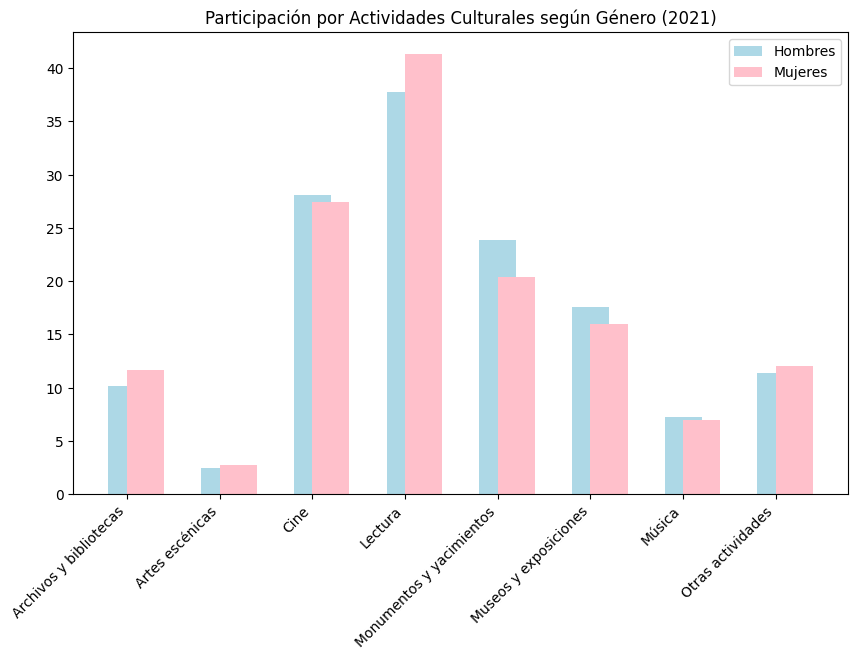

In [232]:
grupo_actividades = datos_museos_2021.index
hombres = datos_museos_2021['Hombres_2021']
mujeres = datos_museos_2021['Mujeres_2021']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(grupo_actividades, hombres, width=0.4, label='Hombres', align='center', color="lightblue")
ax.bar(grupo_actividades, mujeres, width=0.4, label='Mujeres', align='edge', color="pink")

ax.set_title('Participación por Actividades Culturales según Género (2021)')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

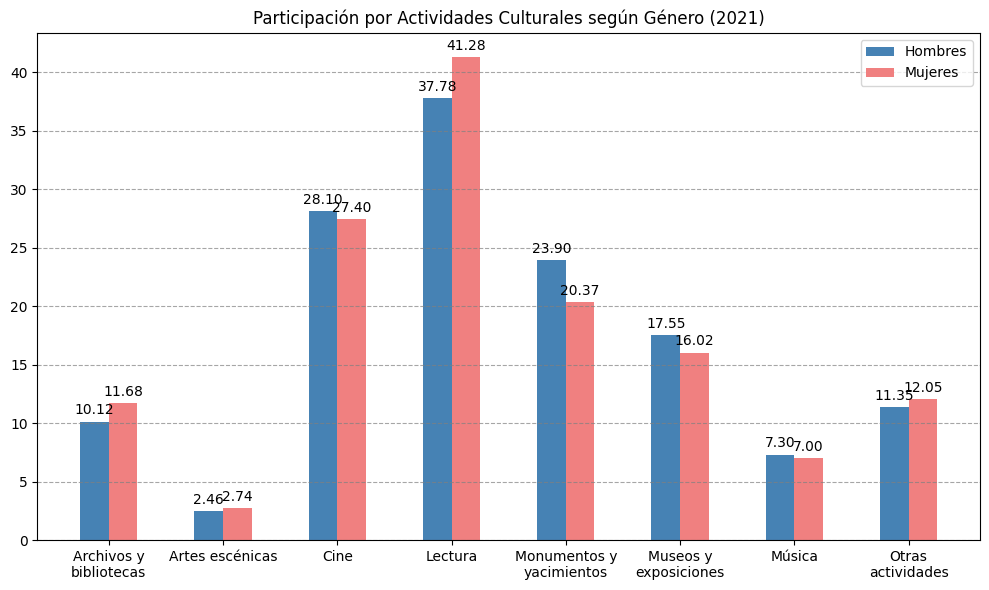

In [234]:
# Usar los datos del DataFrame
grupo_actividades = datos_museos_2021.index
hombres = datos_museos_2021['Hombres_2021']
mujeres = datos_museos_2021['Mujeres_2021']

# Definir la posición de las barras
x = np.arange(len(grupo_actividades))  # el rango de las actividades
width = 0.25  # Ajustar el ancho de las barras para hacerlas más finas

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para hombres y mujeres ajustadas para que no se superpongan
rects1 = ax.bar(x - width/2, hombres, width, label='Hombres', color='steelblue')
rects2 = ax.bar(x + width/2, mujeres, width, label='Mujeres', color='lightcoral')

# Añadir etiquetas
ax.set_title('Participación por Actividades Culturales según Género (2021)')
ax.set_xticks(x)

# Ajustar las etiquetas para que se ajusten en varias líneas si es necesario
wrapped_labels = [textwrap.fill(label, 15) for label in grupo_actividades]  # 15 es el ancho máximo de caracteres por línea
ax.set_xticklabels(wrapped_labels)

ax.legend()

# Añadir las etiquetas de valor sobre cada barra
def autolabel(rects):
    """Añadir etiquetas encima de las barras."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Formato con dos decimales
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento en píxeles
                    textcoords="offset points",
                    ha='center', va='bottom')

# Llamar a la función para añadir las etiquetas
autolabel(rects1)
autolabel(rects2)

# Añadir la cuadrícula detrás de las barras
ax.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.7)

# Aplicar un layout ajustado para evitar solapamientos
fig.tight_layout()

# Mostrar el gráfico
plt.show()


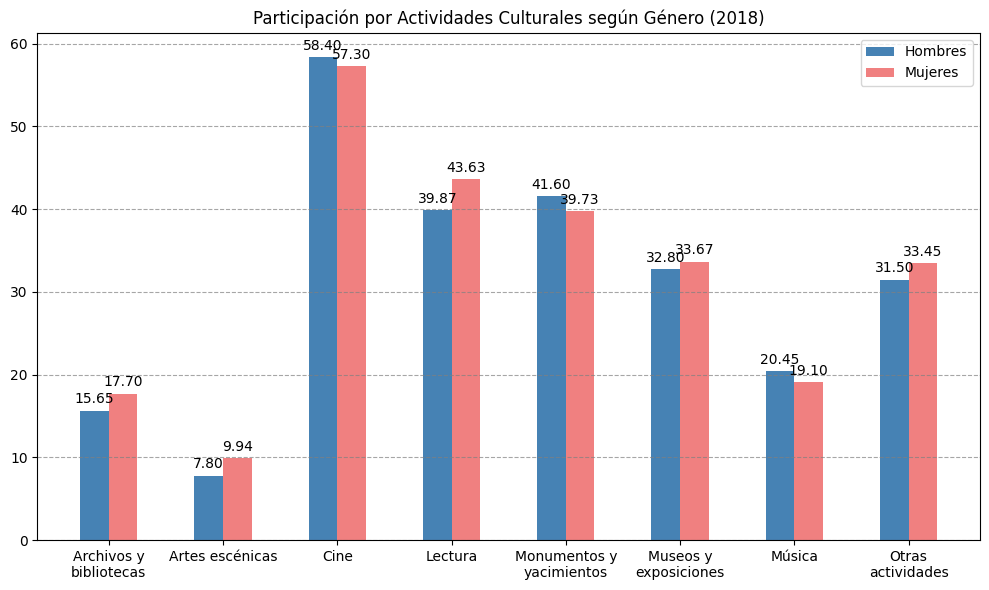

In [235]:
# Usar los datos del DataFrame
grupo_actividades_2 = datos_museos_2018.index
hombres_2 = datos_museos_2018['Hombres_2018']
mujeres_2 = datos_museos_2018['Mujeres_2018']

# Definir la posición de las barras
x = np.arange(len(grupo_actividades_2))  # el rango de las actividades
width = 0.25  # Ajustar el ancho de las barras para hacerlas más finas

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para hombres y mujeres ajustadas para que no se superpongan
rects1 = ax.bar(x - width/2, hombres_2, width, label='Hombres', color='steelblue')
rects2 = ax.bar(x + width/2, mujeres_2, width, label='Mujeres', color='lightcoral')

# Añadir etiquetas
ax.set_title('Participación por Actividades Culturales según Género (2018)')
ax.set_xticks(x)

# Ajustar las etiquetas para que se ajusten en varias líneas si es necesario
wrapped_labels = [textwrap.fill(label, 15) for label in grupo_actividades_2]  # 15 es el ancho máximo de caracteres por línea
ax.set_xticklabels(wrapped_labels)

ax.legend()

# Añadir las etiquetas de valor sobre cada barra
def autolabel(rects):
    """Añadir etiquetas encima de las barras."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Formato con dos decimales
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento en píxeles
                    textcoords="offset points",
                    ha='center', va='bottom')

# Llamar a la función para añadir las etiquetas
autolabel(rects1)
autolabel(rects2)

# Añadir la cuadrícula detrás de las barras
ax.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.7)

# Aplicar un layout ajustado para evitar solapamientos
fig.tight_layout()

# Mostrar el gráfico
plt.show()


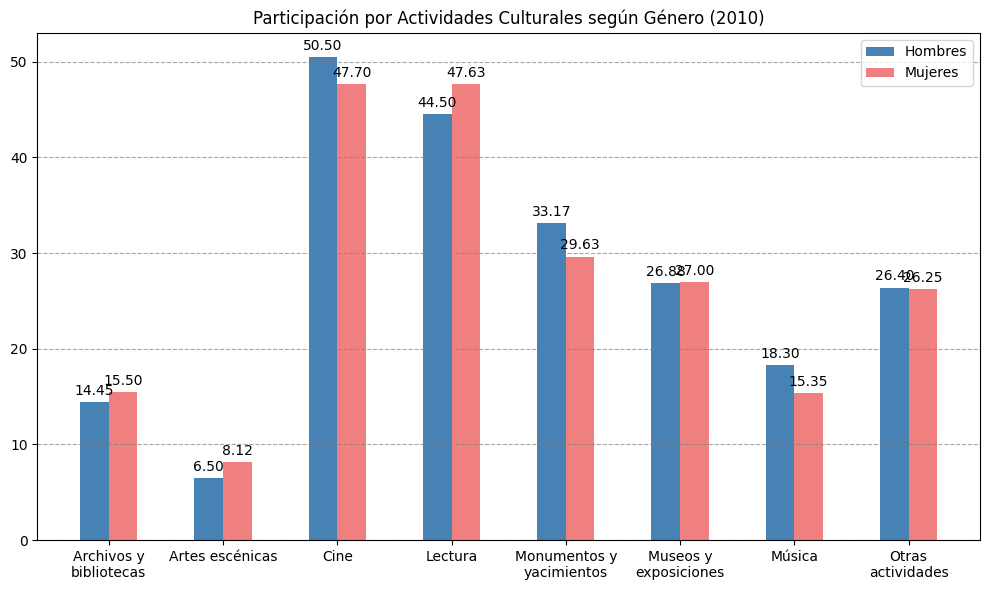

In [236]:
# Usar los datos del DataFrame
grupo_actividades_3 = datos_museos_2010.index
hombres_3 = datos_museos_2010['Hombres_2010']
mujeres_3 = datos_museos_2010['Mujeres_2010']

# Definir la posición de las barras
x = np.arange(len(grupo_actividades_3))  # el rango de las actividades
width = 0.25  # Ajustar el ancho de las barras para hacerlas más finas

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para hombres y mujeres ajustadas para que no se superpongan
rects1 = ax.bar(x - width/2, hombres_3, width, label='Hombres', color='steelblue')
rects2 = ax.bar(x + width/2, mujeres_3, width, label='Mujeres', color='lightcoral')

# Añadir etiquetas
ax.set_title('Participación por Actividades Culturales según Género (2010)')
ax.set_xticks(x)

# Ajustar las etiquetas para que se ajusten en varias líneas si es necesario
wrapped_labels = [textwrap.fill(label, 15) for label in grupo_actividades_3]  # 15 es el ancho máximo de caracteres por línea
ax.set_xticklabels(wrapped_labels)

ax.legend()

# Añadir las etiquetas de valor sobre cada barra
def autolabel(rects):
    """Añadir etiquetas encima de las barras."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Formato con dos decimales
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento en píxeles
                    textcoords="offset points",
                    ha='center', va='bottom')

# Llamar a la función para añadir las etiquetas
autolabel(rects1)
autolabel(rects2)

# Añadir la cuadrícula detrás de las barras
ax.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.7)

# Aplicar un layout ajustado para evitar solapamientos
fig.tight_layout()

# Mostrar el gráfico
plt.show()


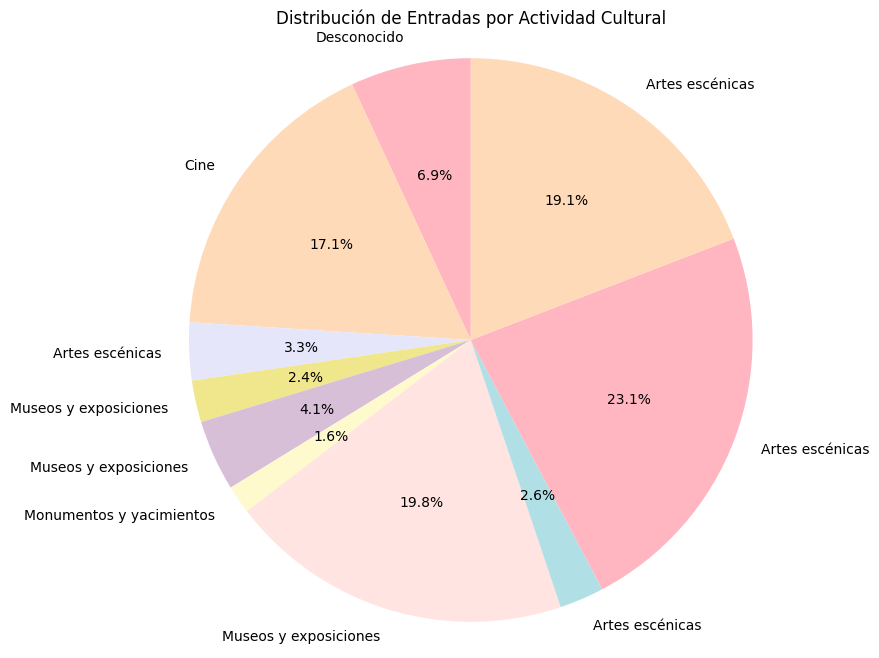

In [79]:
import matplotlib.pyplot as plt

# Usar los datos del DataFrame
actividades = jobo_entradas_2023['Grupo_Actividad']
entradas = jobo_entradas_2023['Entradas']

# Crear el gráfico circular
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#FFB6C1', '#FFDAB9', '#E6E6FA', '#F0E68C', '#D8BFD8', '#FFFACD', '#FFE4E1', '#B0E0E6']  # Colores pastel

ax.pie(entradas, labels=actividades, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Distribución de Entradas por Actividad Cultural')

# Asegurar que el gráfico sea circular
ax.axis('equal')

# Mostrar el gráfico
plt.show()


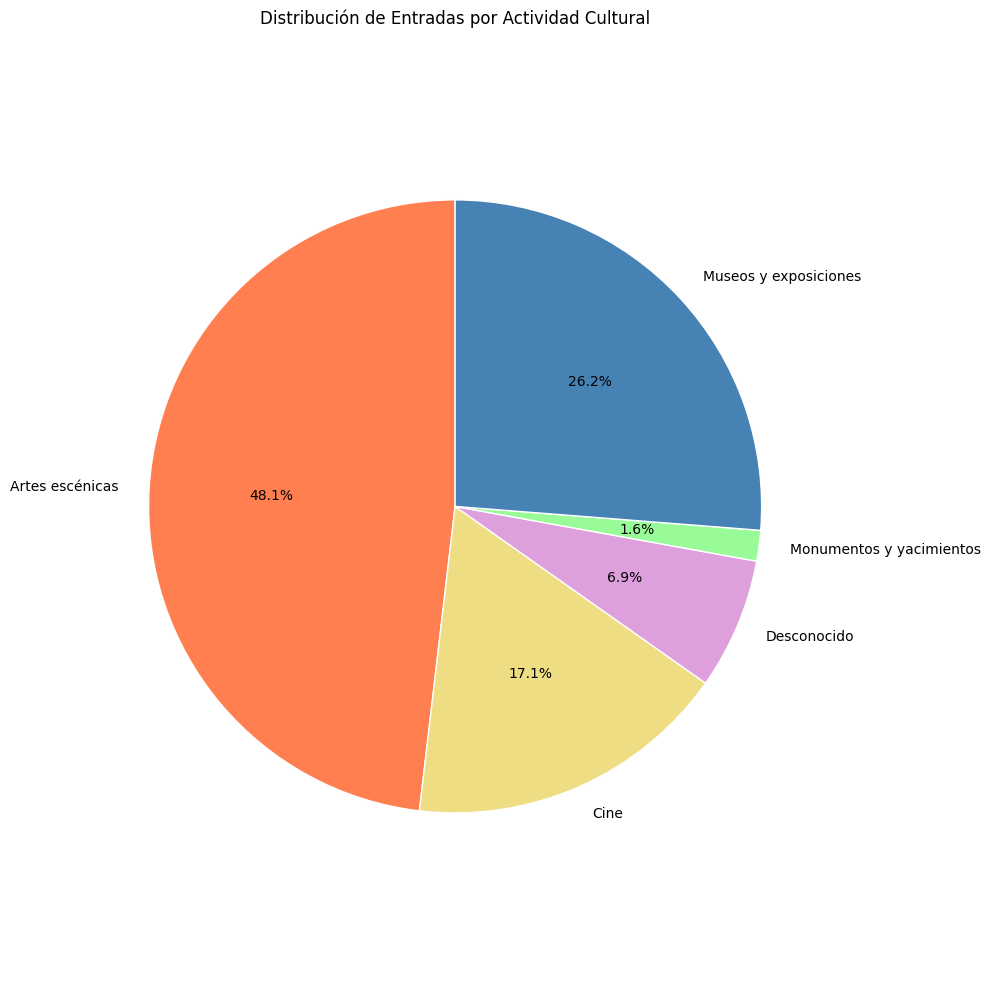

In [242]:
# Agrupar los datos por 'Grupo_Actividad' sumando las entradas
df_actividad_agrupada = jobo_entradas_2023.groupby('Grupo_Actividad').sum().reset_index()

# Extraer las actividades y las entradas
actividades = df_actividad_agrupada['Grupo_Actividad']
entradas = df_actividad_agrupada['Entradas']

# Colores base apagados, reutilizando el diccionario anterior
grupo_colores = {
    'Artes escénicas': '#FF7F50',    # Coral
    'Cine': '#EEDD82',               # Dorado apagado
    'Museos y exposiciones': '#4682B4',  # Azul acero (diferenciado)
    'Monumentos y yacimientos': '#98FB98',  # Verde pálido
    'Desconocido': '#DDA0DD'         # Púrpura apagado
    }

# Crear lista de colores según el Grupo_Actividad
colores_actividades = [grupo_colores[actividad] for actividad in actividades]

# Crear el gráfico circular
fig, ax = plt.subplots(figsize=(10, 10))

# Crear el gráfico de pastel
ax.pie(entradas, labels=actividades, autopct='%1.1f%%', startangle=90, colors=colores_actividades, wedgeprops={'edgecolor': 'white'})

# Título del gráfico
ax.set_title('Distribución de Entradas por Actividad Cultural')

# Asegurar que el gráfico sea circular
ax.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

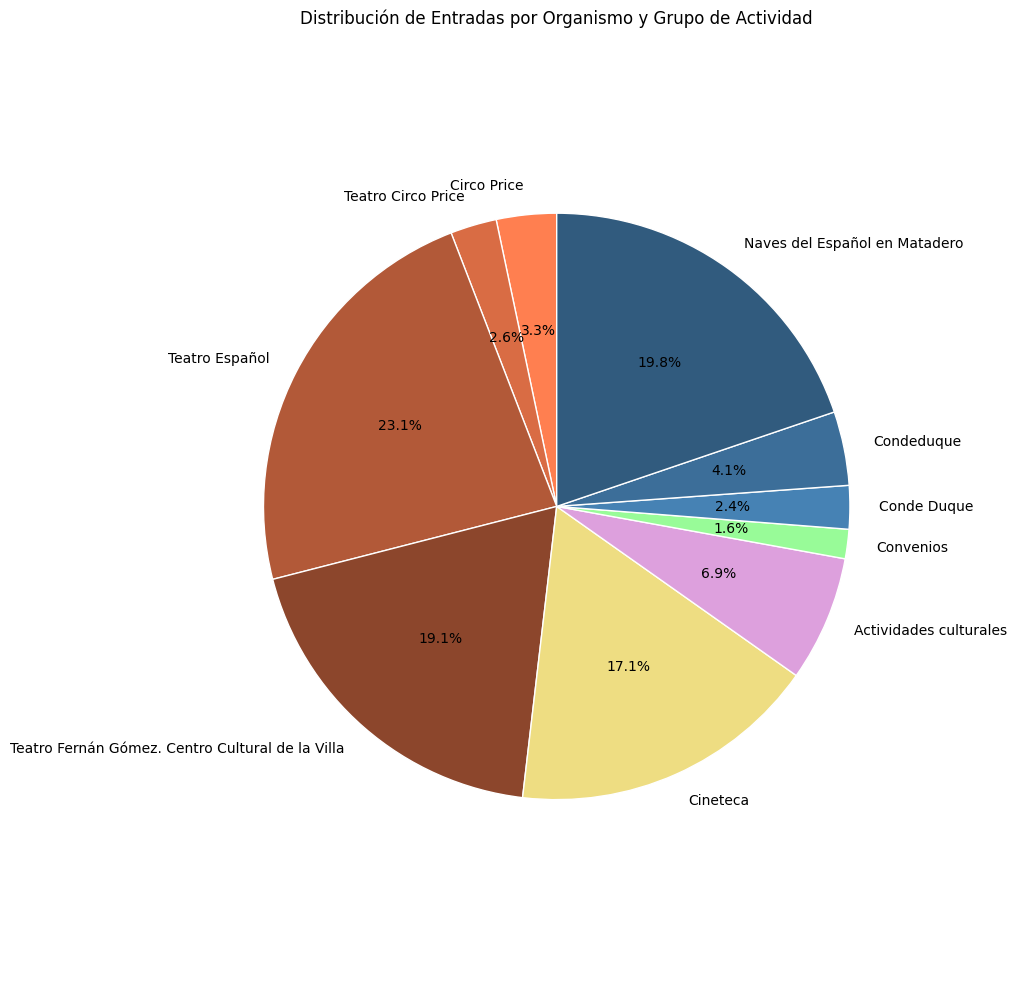

In [241]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.patches import Patch

# Agrupar los datos por 'Grupo_Actividad' para mantener los organismos contiguos
df_organismos_agrupados = jobo_entradas_2023.sort_values('Grupo_Actividad')

# Extraer las actividades, organismos y las entradas
actividades = df_organismos_agrupados['Grupo_Actividad']
organismos = df_organismos_agrupados['Organismo']
entradas = df_organismos_agrupados['Entradas']

# Colores base apagados para cada grupo de actividades
grupo_colores = {
    'Artes escénicas': '#FF7F50',    # Coral
    'Cine': '#EEDD82',               # Dorado apagado
    'Museos y exposiciones': '#4682B4',  # Azul acero (diferenciado)
    'Monumentos y yacimientos': '#98FB98',  # Verde pálido
    'Desconocido': '#DDA0DD'         # Púrpura apagado
}

# Función para generar variaciones de color dentro de un grupo (más clara u oscura)
def color_variations(base_color, n_variations):
    base_color = np.array(mcolors.to_rgb(base_color))  # Convertir a RGB
    variations = [mcolors.to_hex(base_color * (1 - i * 0.15)) for i in range(n_variations)]  # Variaciones
    return variations

# Asignar colores a los organismos según su grupo de actividad
colores_por_organismo = []
for actividad in actividades.unique():
    n_organismos = sum(actividades == actividad)
    colores_por_organismo.extend(color_variations(grupo_colores[actividad], n_organismos))

# Crear el gráfico circular
fig, ax = plt.subplots(figsize=(10, 10))

# Crear el gráfico de pastel, añadiendo los porcentajes para cada organismo
ax.pie(entradas, labels=organismos, autopct='%1.1f%%', startangle=90, colors=colores_por_organismo, wedgeprops={'edgecolor': 'white'})

# Título del gráfico
ax.set_title('Distribución de Entradas por Organismo y Grupo de Actividad')

# Asegurar que el gráfico sea circular
ax.axis('equal')


# Ajustar el espaciado para que las etiquetas no se solapen
plt.tight_layout()
plt.show()


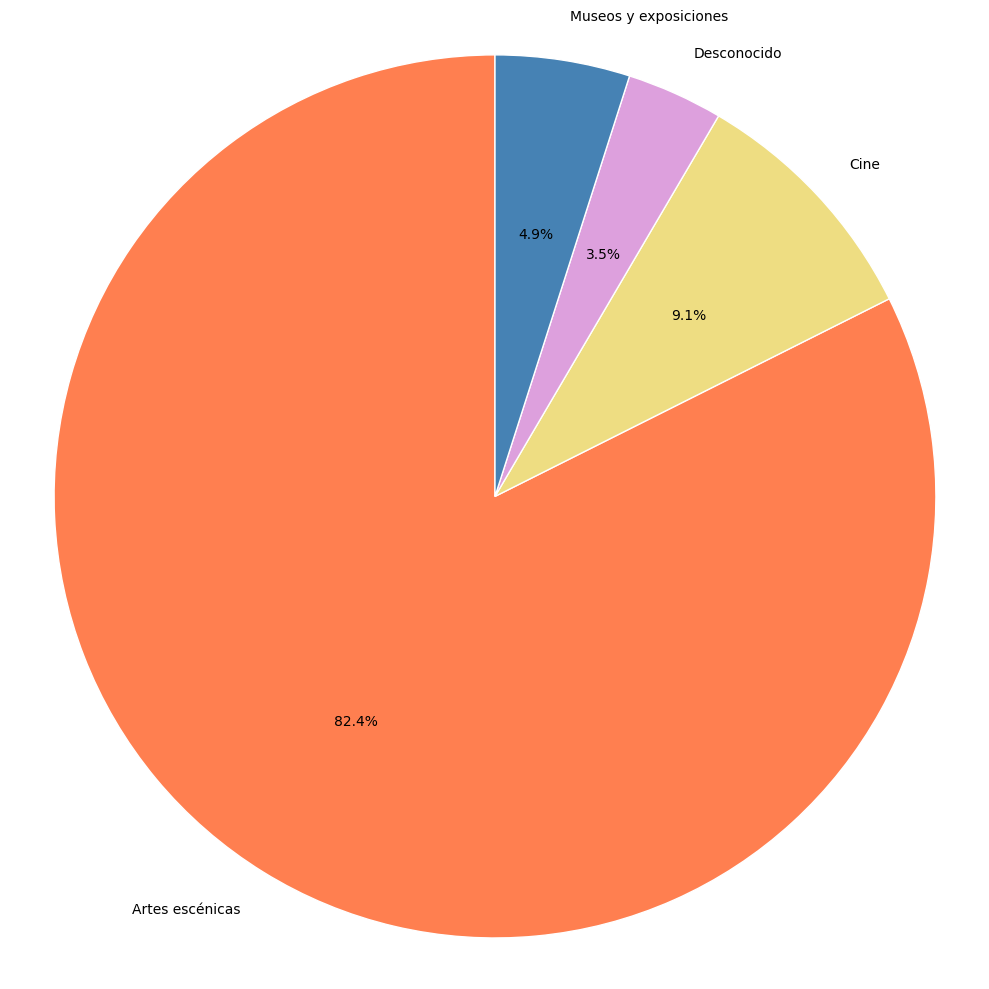

In [243]:
# Agrupar los datos por 'Grupo_Actividad' sumando las entradas
df_actividad_agrupada = jobo_entradas_2022.groupby('Grupo_Actividad').sum().reset_index()

# Extraer las actividades y las entradas
actividades = df_actividad_agrupada['Grupo_Actividad']
entradas = df_actividad_agrupada['Entradas']

# Colores base apagados, reutilizando el diccionario anterior
grupo_colores = {
    'Artes escénicas': '#FF7F50',    # Coral
    'Cine': '#EEDD82',               # Dorado apagado
    'Museos y exposiciones': '#4682B4',  # Azul acero (diferenciado)
    'Monumentos y yacimientos': '#98FB98',  # Verde pálido
    'Desconocido': '#DDA0DD'}        # Púrpura apagado}

# Crear lista de colores según el Grupo_Actividad
colores_actividades = [grupo_colores[actividad] for actividad in actividades]

# Crear el gráfico circular
fig, ax = plt.subplots(figsize=(10, 10))

# Crear el gráfico de pastel
ax.pie(entradas, labels=actividades, autopct='%1.1f%%', startangle=90, colors=colores_actividades, wedgeprops={'edgecolor': 'white'})

# Asegurar que el gráfico sea circular
ax.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

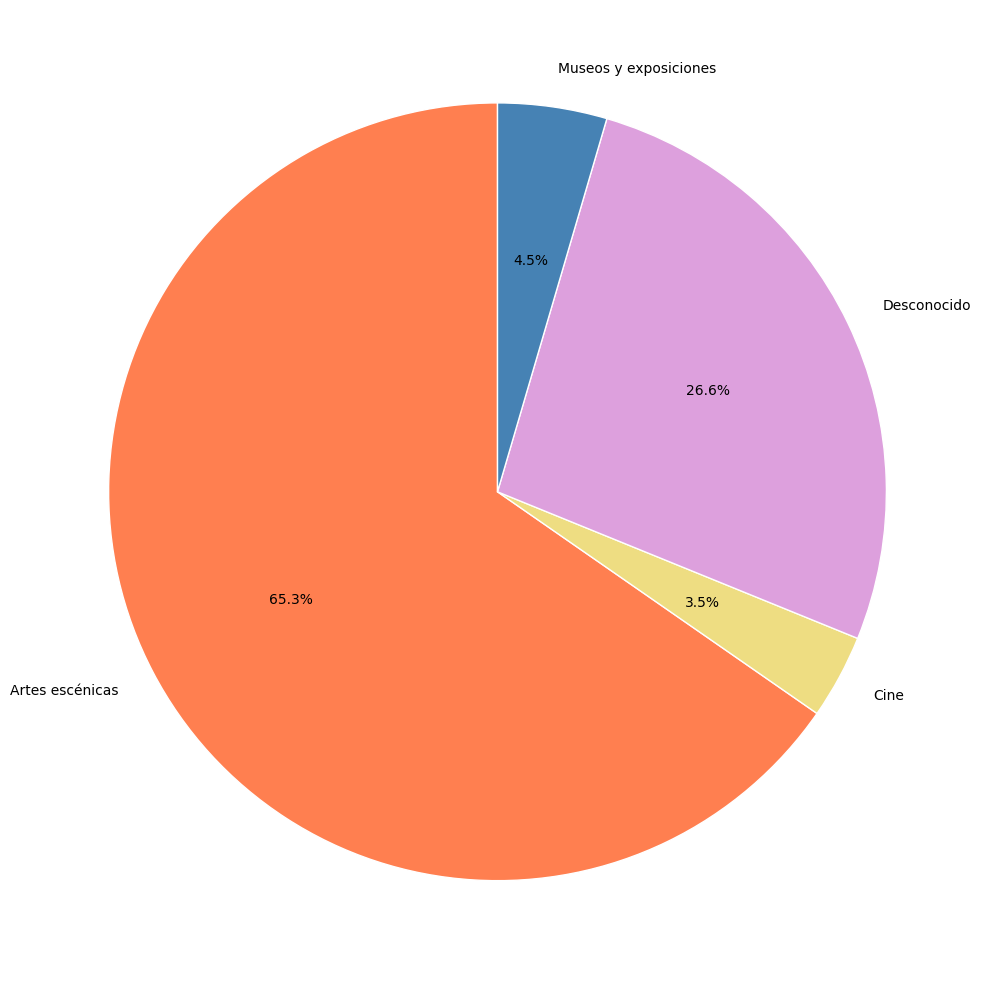

In [244]:
# Agrupar los datos por 'Grupo_Actividad' sumando las entradas
df_actividad_agrupada = jobo_entradas_2021.groupby('Grupo_Actividad').sum().reset_index()

# Extraer las actividades y las entradas
actividades = df_actividad_agrupada['Grupo_Actividad']
entradas = df_actividad_agrupada['Entradas']

# Colores base apagados, reutilizando el diccionario anterior
grupo_colores = {
    'Artes escénicas': '#FF7F50',    # Coral
    'Cine': '#EEDD82',               # Dorado apagado
    'Museos y exposiciones': '#4682B4',  # Azul acero (diferenciado)
    'Monumentos y yacimientos': '#98FB98',  # Verde pálido
    'Desconocido': '#DDA0DD'}        # Púrpura apagado}

# Crear lista de colores según el Grupo_Actividad
colores_actividades = [grupo_colores[actividad] for actividad in actividades]

# Crear el gráfico circular
fig, ax = plt.subplots(figsize=(10, 10))

# Crear el gráfico de pastel
ax.pie(entradas, labels=actividades, autopct='%1.1f%%', startangle=90, colors=colores_actividades, wedgeprops={'edgecolor': 'white'})

# Asegurar que el gráfico sea circular
ax.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

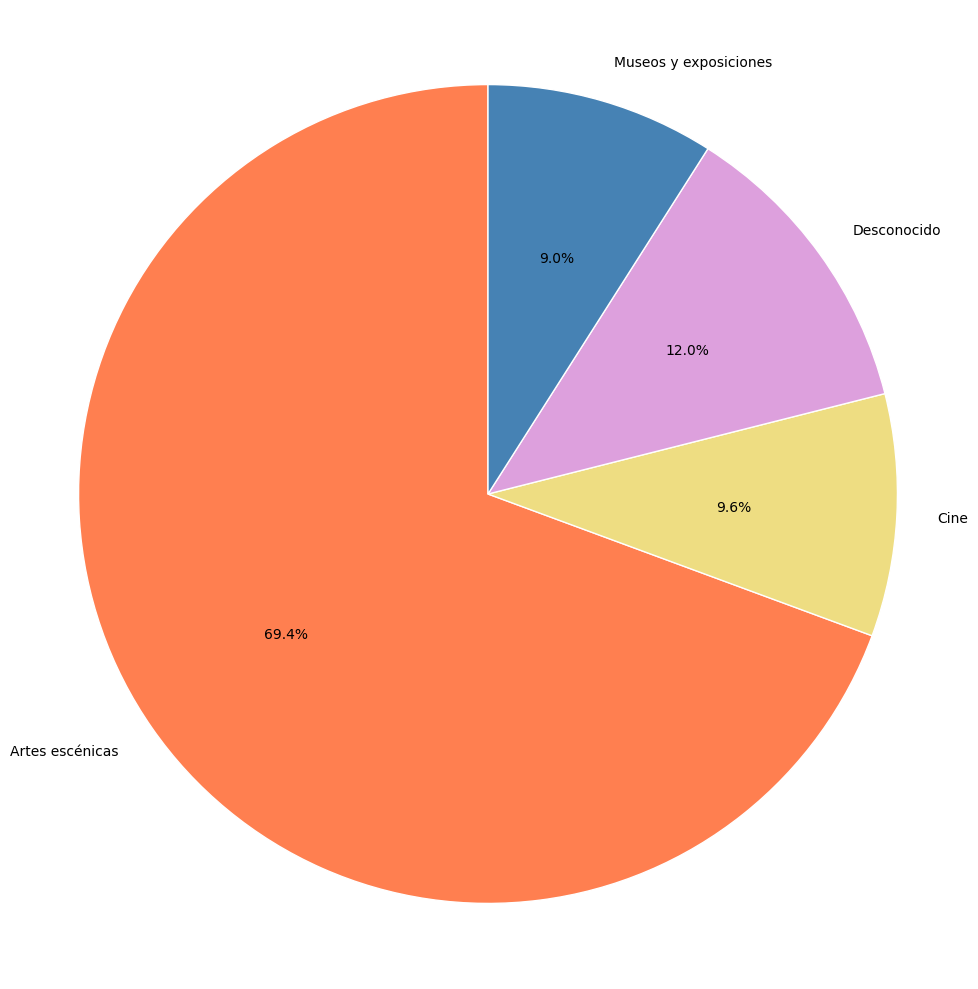

In [245]:
# Agrupar los datos por 'Grupo_Actividad' sumando las entradas
df_actividad_agrupada = jobo_entradas_2020.groupby('Grupo_Actividad').sum().reset_index()

# Extraer las actividades y las entradas
actividades = df_actividad_agrupada['Grupo_Actividad']
entradas = df_actividad_agrupada['Entradas']

# Colores base apagados, reutilizando el diccionario anterior
grupo_colores = {
    'Artes escénicas': '#FF7F50',    # Coral
    'Cine': '#EEDD82',               # Dorado apagado
    'Museos y exposiciones': '#4682B4',  # Azul acero (diferenciado)
    'Monumentos y yacimientos': '#98FB98',  # Verde pálido
    'Desconocido': '#DDA0DD'}        # Púrpura apagado}

# Crear lista de colores según el Grupo_Actividad
colores_actividades = [grupo_colores[actividad] for actividad in actividades]

# Crear el gráfico circular
fig, ax = plt.subplots(figsize=(10, 10))

# Crear el gráfico de pastel
ax.pie(entradas, labels=actividades, autopct='%1.1f%%', startangle=90, colors=colores_actividades, wedgeprops={'edgecolor': 'white'})

# Asegurar que el gráfico sea circular
ax.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

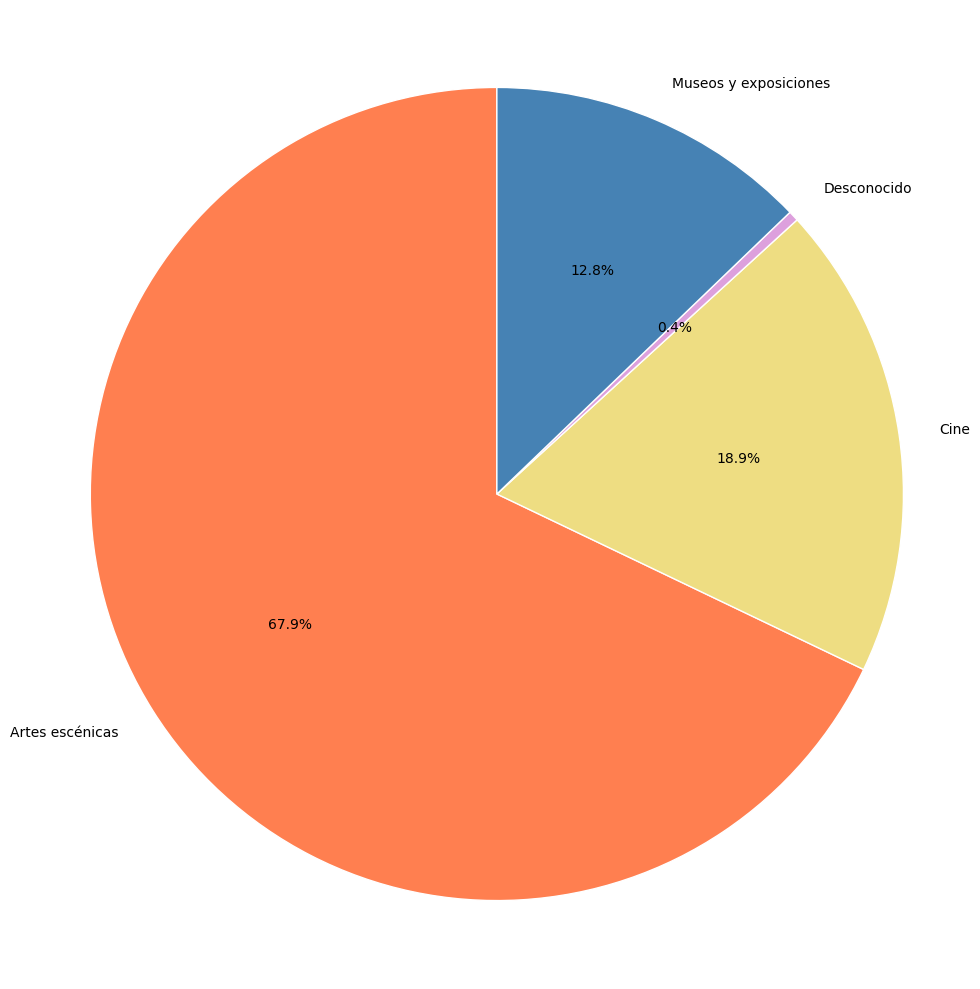

In [246]:
# Agrupar los datos por 'Grupo_Actividad' sumando las entradas
df_actividad_agrupada = jobo_entradas_2019.groupby('Grupo_Actividad').sum().reset_index()

# Extraer las actividades y las entradas
actividades = df_actividad_agrupada['Grupo_Actividad']
entradas = df_actividad_agrupada['Entradas']

# Colores base apagados, reutilizando el diccionario anterior
grupo_colores = {
    'Artes escénicas': '#FF7F50',    # Coral
    'Cine': '#EEDD82',               # Dorado apagado
    'Museos y exposiciones': '#4682B4',  # Azul acero (diferenciado)
    'Monumentos y yacimientos': '#98FB98',  # Verde pálido
    'Desconocido': '#DDA0DD'}        # Púrpura apagado}

# Crear lista de colores según el Grupo_Actividad
colores_actividades = [grupo_colores[actividad] for actividad in actividades]

# Crear el gráfico circular
fig, ax = plt.subplots(figsize=(10, 10))

# Crear el gráfico de pastel
ax.pie(entradas, labels=actividades, autopct='%1.1f%%', startangle=90, colors=colores_actividades, wedgeprops={'edgecolor': 'white'})

# Asegurar que el gráfico sea circular
ax.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

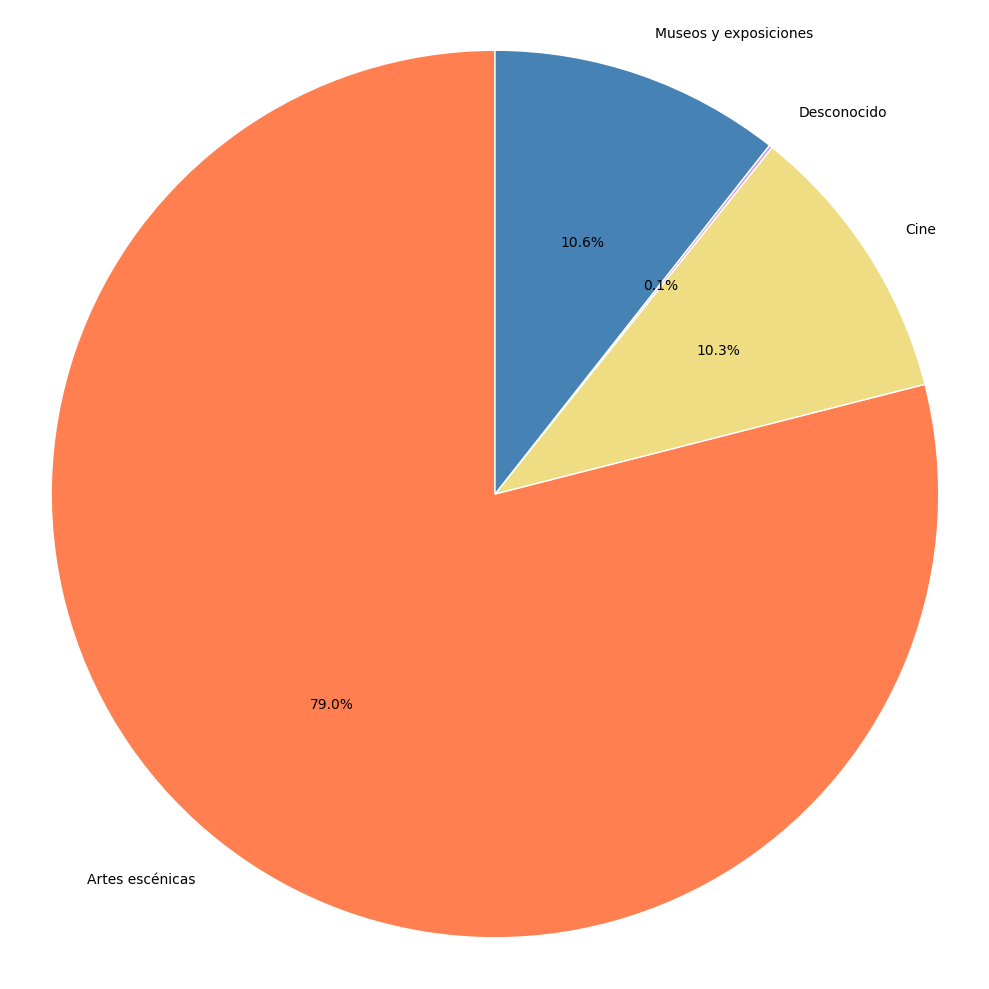

In [247]:
# Agrupar los datos por 'Grupo_Actividad' sumando las entradas
df_actividad_agrupada = jobo_entradas_2018.groupby('Grupo_Actividad').sum().reset_index()

# Extraer las actividades y las entradas
actividades = df_actividad_agrupada['Grupo_Actividad']
entradas = df_actividad_agrupada['Entradas']

# Colores base apagados, reutilizando el diccionario anterior
grupo_colores = {
    'Artes escénicas': '#FF7F50',    # Coral
    'Cine': '#EEDD82',               # Dorado apagado
    'Museos y exposiciones': '#4682B4',  # Azul acero (diferenciado)
    'Monumentos y yacimientos': '#98FB98',  # Verde pálido
    'Desconocido': '#DDA0DD'}        # Púrpura apagado}

# Crear lista de colores según el Grupo_Actividad
colores_actividades = [grupo_colores[actividad] for actividad in actividades]

# Crear el gráfico circular
fig, ax = plt.subplots(figsize=(10, 10))

# Crear el gráfico de pastel
ax.pie(entradas, labels=actividades, autopct='%1.1f%%', startangle=90, colors=colores_actividades, wedgeprops={'edgecolor': 'white'})

# Asegurar que el gráfico sea circular
ax.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()